In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Load the breast cancer dataset
data = load_breast_cancer()
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:

# Separate features and target variable
X = data.data
y = data.target

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)


GaussianNB()

In [7]:
# Predict the labels of the test data
y_pred = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 0.9422110552763819
Testing Accuracy: 0.9239766081871345


In [8]:
# Predict the probabilities of the test data being malignant or benign
y_proba = clf.predict_proba(X_test)

# Print the first few probabilities
print(y_proba[:5])


[[9.99999623e-01 3.77053186e-07]
 [4.48249009e-13 1.00000000e+00]
 [3.80802767e-14 1.00000000e+00]
 [1.92053261e-11 1.00000000e+00]
 [2.78578114e-16 1.00000000e+00]]


[[ 57   6]
 [  7 101]]


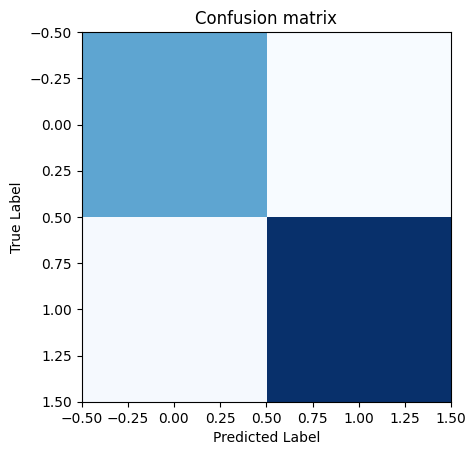

In [9]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Visualize the confusion matrix (using matplotlib or seaborn)
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
